# Problem Set 1

In [1]:
import numpy as np
import pandas as pd
import datetime
import pandas_datareader
import matplotlib.pyplot as plt

## 0. Example Code

Below is some example code to get you started. It should help you get familiar with some of the syntax and functions you will be using in this assignment. 

In [2]:
# Use the datetime module - a way to handle dates in python - to create variables for the start and end dates of the data you want to download. 
example_date = datetime.datetime(2020, 1, 1) 
print("example_date is an instance of the class ", type(example_date)) # This will print the type of the variable, which should be datetime.datetime
print(example_date) # This will print the date in the format YYYY-MM-DD HH:MM:SS
print("example_date.year is ", example_date.year) # This will print the year of the date
print("example_date.month is ", example_date.month) # This will print the month of the date
print("example_date.day is ", example_date.day) # This will print the day of the date

example_date is an instance of the class  <class 'datetime.datetime'>
2020-01-01 00:00:00
example_date.year is  2020
example_date.month is  1
example_date.day is  1


In [3]:
# Get more help on the datetime class and its methods
help(datetime.datetime)

Help on class datetime in module datetime:

class datetime(date)
 |  datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
 |
 |  The year, month and day arguments are required. tzinfo may be None, or an
 |  instance of a tzinfo subclass. The remaining arguments may be ints.
 |
 |  Method resolution order:
 |      datetime
 |      date
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __add__(self, value, /)
 |      Return self+value.
 |
 |  __eq__(self, value, /)
 |      Return self==value.
 |
 |  __ge__(self, value, /)
 |      Return self>=value.
 |
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |
 |  __gt__(self, value, /)
 |      Return self>value.
 |
 |  __hash__(self, /)
 |      Return hash(self).
 |
 |  __le__(self, value, /)
 |      Return self<=value.
 |
 |  __lt__(self, value, /)
 |      Return self<value.
 |
 |  __ne__(self, value, /)
 |      Return self!=value.
 |
 |  __radd__(self, value, /)
 |      Return value+

In [4]:
# Specify the start and end dates for the data you want to download.
start = datetime.datetime(1955,1,1)
end = datetime.datetime(2024,1,1)

datelist = pd.date_range(start=start, end=end, freq='QS') # freq='QS' means quarterly frequency at the start of the quarter
# We are assigning a value to a variable named 'datelist' here.
print('total number of quarters:', len(datelist)) # The 'len' function returns the number of elements in the 'datelist'. It's a command that you can use to check the length of any list or array in Python.
print('first quarter:', datelist[0]) # This will print the first quarter in the list, which is the first date in the list.
print('last quarter:', datelist[-1]) # This will print the last quarter in the list, which is the last date in the list.

total number of quarters: 277
first quarter: 1955-01-01 00:00:00
last quarter: 2024-01-01 00:00:00


In [5]:
# List the series names to download
indicator_list = ['GDP']

# Use the pandas_datareader library to download the data from the Federal Reserve Economic Data (FRED) database. The 'DataReader' function takes the list of series names, the source ('fred'), and the start and end dates as arguments.

# We can pull from multiple sources in one go. Just combine them in a list.
df = pandas_datareader.data.DataReader(indicator_list, 'fred', start, end)
df.head(5) # Use .head(5) to print the first 5 rows of the dataframe. This is a good way to check if the data was downloaded correctly and to see the structure of the dataframe.

,GDP
DATE,
1955-01-01,413.073
1955-04-01,421.532
1955-07-01,430.221
1955-10-01,437.092
1956-01-01,439.746


In [6]:
df.info() # This will print a summary of the dataframe, including the number of non-null values and the data types of each column.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 277 entries, 1955-01-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     277 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB


In [7]:
# Example of creating a new column in a dataframe:
df['new_column'] = df['GDP'] * 2 # multiply every element times 2
df.head(5) # Check the new column

,GDP,new_column
DATE,,
1955-01-01,413.073,826.146
1955-04-01,421.532,843.064
1955-07-01,430.221,860.442
1955-10-01,437.092,874.184
1956-01-01,439.746,879.492


In [8]:
# You might want to merge two dataframes with different frequencies. For example, you might have a dataframe with quarterly data and another with monthly data. If you want all your data in quarterly frequency, you can use the 'asfreq' or 'resample' method to convert the monthly data to quarterly frequency.

df2 = pandas_datareader.data.DataReader('INDPRO', 'fred', start, end) # Industrial production is often used as a proxy for GDP that is available at monthly frequency
print(df2.index) # Note that this seems to be monthly frequency

# This is a more manual way of downsamling.
mask = df2.index.isin(df.index) # It checks for each index element in df2 if it is also in df. The result is a boolean array of the same length as df2, where each element is True if the corresponding index in df2 is also in df, and False otherwise.
print(mask)

df2_quarterly = df2[mask] # This will filter df2 to only the dates that correspond to the beginning of quarters in df.
df2_quarterly.head(5)

DatetimeIndex(['1955-01-01', '1955-02-01', '1955-03-01', '1955-04-01',
               '1955-05-01', '1955-06-01', '1955-07-01', '1955-08-01',
               '1955-09-01', '1955-10-01',
               ...
               '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
               '2023-12-01', '2024-01-01'],
              dtype='datetime64[ns]', name='DATE', length=829, freq=None)
[ True False False  True False False  True False False  True False False
  True False False  True False False  True False False  True False False
  True False False  True False False  True False False  True False False
  True False False  True False False  True False False  True False False
  True False False  True False False  True False False  True False False
  True False False  True False False  True False False  True False False
  True False False  True False False  True False False  True False False
  True False False  True 

,INDPRO
DATE,
1955-01-01,19.2735
1955-04-01,20.2143
1955-07-01,20.7251
1955-10-01,21.1820
1956-01-01,21.4508


In [9]:
# one way to connect the dataframes:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs: 'Iterable[Series | DataFrame] | Mapping[HashableT, Series | DataFrame]', *, axis: 'Axis' = 0, join: 'str' = 'outer', ignore_index: 'bool' = False, keys: 'Iterable[Hashable] | None' = None, levels=None, names: 'list[HashableT] | None' = None, verify_integrity: 'bool' = False, sort: 'bool' = False, copy: 'bool | None' = None) -> 'DataFrame | Series'
    Concatenate pandas objects along a particular axis.

    Allows optional set logic along the other axes.

    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.

    Parameters
    ----------
    objs : a sequence or mapping of Series or DataFrame objects
        If a mapping is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects

In [10]:
# Have a look at the pandas cheat sheet for some illustrations of how to combine dataframes
df_combined = pd.concat([df, df2_quarterly], axis=1) # This will concatenate the two dataframes along the columns (axis=1). The result is a new dataframe that contains all the columns from both dataframes.
df_combined.head(5) # Check the new dataframe

,GDP,new_column,INDPRO
DATE,,,
1955-01-01,413.073,826.146,19.2735
1955-04-01,421.532,843.064,20.2143
1955-07-01,430.221,860.442,20.7251
1955-10-01,437.092,874.184,21.1820
1956-01-01,439.746,879.492,21.4508


For more information see Cheat-Sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

## 1. Macroeconomic Data

### 1.1: 
Download quarterly data on nominal GDP and the GDP deflator using the Pandas datareader library and the codes ’GDP’ and ’GDPDEF’. From this data calculate a series for real GDP and inflation.

In [11]:
# Need first to encode dates in a python friendly to specify the length of the desired time period. 
# Use the datetime module - it is the general way to handle dates in python. 
start = datetime.datetime(1955,1,1)
end = datetime.datetime(2024,1,1)

datelist = pd.date_range(start=start, end=end, freq='QS') # freq='QS' means quarterly frequency at the start of the quarter
print('total number of quarters:', len(datelist))

total number of quarters: 277


In [12]:
# list the series names to download
indicator_list = ['GDP', 'GDPDEF']

# We can pull from multiple sources in one go. Just combine them in a list.
df = pandas_datareader.data.DataReader(indicator_list, 'fred', start, end)
df.head(5)

,GDP,GDPDEF
DATE,,
1955-01-01,413.073,13.675
1955-04-01,421.532,13.731
1955-07-01,430.221,13.827
1955-10-01,437.092,13.964
1956-01-01,439.746,14.104


In [13]:
# Calculate real GDP
# Real GDP = Nominal GDP / (GDP Deflator / 100)
df['RGDP'] = df['GDP'] / (df['GDPDEF'] / 100)
df.head(5)

,GDP,GDPDEF,RGDP
DATE,,,
1955-01-01,413.073,13.675,3020.643510
1955-04-01,421.532,13.731,3069.929357
1955-07-01,430.221,13.827,3111.455847
1955-10-01,437.092,13.964,3130.134632
1956-01-01,439.746,14.104,3117.881452


In [14]:
# Calculate Inflation based on the GDP Deflator
df['INFL'] = df['GDPDEF'].pct_change(1) * 100
# use manual calculation
# df['INFL'] = (df['GDPDEF'] - df['GDPDEF'].shift(1)) / df['GDPDEF'].shift(1) * 100
# use log differences
# df['INFL'] = (np.log(df['GDPDEF']) - np.log(df['GDPDEF'].shift(1))) * 100
df.head(5) # Check the new column

,GDP,GDPDEF,RGDP,INFL
DATE,,,,
1955-01-01,413.073,13.675,3020.643510,NaN
1955-04-01,421.532,13.731,3069.929357,0.409506
1955-07-01,430.221,13.827,3111.455847,0.699148
1955-10-01,437.092,13.964,3130.134632,0.990815
1956-01-01,439.746,14.104,3117.881452,1.002578


### 1.2. 
Calculate the quarterly growth rate for real GDP.

In [15]:
# use build in function
df['RGDP_qoq'] = df['RGDP'].pct_change(1)
# use manual calculation
# df['RGDP_qoq'] = (df['RGDP'] - df['RGDP'].shift(1)) / df['RGDP'].shift(1) * 100
# use log differences
# df['RGDP_qoq'] = (np.log(df['RGDP']) - np.log(df['RGDP'].shift(1))) * 100
df.head(5)

,GDP,GDPDEF,RGDP,INFL,RGDP_qoq
DATE,,,,,
1955-01-01,413.073,13.675,3020.643510,NaN,NaN
1955-04-01,421.532,13.731,3069.929357,0.409506,0.016316
1955-07-01,430.221,13.827,3111.455847,0.699148,0.013527
1955-10-01,437.092,13.964,3130.134632,0.990815,0.006003
1956-01-01,439.746,14.104,3117.881452,1.002578,-0.003915


### 1.3: 
Also download quarterly data on unemployment and the federal funds fate from FRED and combine the data for real GDP, inflation, unemployment and the federal funds rate at quarterly frequency in one DataFrame.

In [16]:
indicator_list = ['UNRATE', 'DFF']

df2 = pandas_datareader.data.DataReader(indicator_list, 'fred', start, end)
df2.head()

,UNRATE,DFF
DATE,,
1955-01-01,4.9,1.44
1955-01-02,NaN,1.44
1955-01-03,NaN,1.44
1955-01-04,NaN,1.25
1955-01-05,NaN,1.00


The data is in different frequency. Use a mask to filter the data and keep only the first observations for each quarter.

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25203 entries, 1955-01-01 to 2024-01-01
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  829 non-null    float64
 1   DFF     25203 non-null  float64
dtypes: float64(2)
memory usage: 590.7 KB


In [18]:
mask = df2.index.isin(df.index)
mask

array([ True, False, False, ..., False, False,  True], shape=(25203,))

In [19]:
mask = df2.index.isin(datelist)
df2 = df2.iloc[mask,:]
df2.head(5)

,UNRATE,DFF
DATE,,
1955-01-01,4.9,1.44
1955-04-01,4.7,1.44
1955-07-01,4.0,1.69
1955-10-01,4.3,2.19
1956-01-01,4.0,2.50


The better way might be to resample using some build in pandas functions. 

In [20]:
# using the `asfreq` method.
df2 = pandas_datareader.data.DataReader(indicator_list, 'fred', start, end)
df2 = df2.asfreq('QS', method='ffill')    # ‘ffill’: propagate last valid observation forward to next valid
# df2 = df2.asfreq('QS', method='mean')    
df2.head(5)

,UNRATE,DFF
DATE,,
1955-01-01,4.9,1.44
1955-04-01,4.7,1.44
1955-07-01,4.0,1.69
1955-10-01,4.3,2.19
1956-01-01,4.0,2.50


`.resample()` allows for some more sophisticated methods of resampling. For instance taking the mean sum or maximum value of all observations in a given period when going from a high to low frequency (upsampling). 

In [21]:
# using the `resample` method, which alows for more options for downsampling
df2 = pandas_datareader.data.DataReader(indicator_list, 'fred', start, end)
# df2 = df2.resample('QS').ffill()    # ‘ffill’: propagate last valid observation forward to next valid
# df2 = df2.resample('QS').mean()       # ‘mean’: downsample using the mean of the available data
df2 = df2.resample('QS').first()       # first: downsample using the first of the available data
# df2 = df2.resample('QS').last()        # last: downsample using the last of the available data
df2.head(5)

,UNRATE,DFF
DATE,,
1955-01-01,4.9,1.44
1955-04-01,4.7,1.44
1955-07-01,4.0,1.69
1955-10-01,4.3,2.19
1956-01-01,4.0,2.50


In [22]:
# upsampling by taking the mean
unrate = pandas_datareader.data.DataReader('UNRATE', 'fred', start, end)
unrate.resample('YE').mean().head()
unrate.head()

,UNRATE
DATE,
1955-01-01,4.9
1955-02-01,4.7
1955-03-01,4.6
1955-04-01,4.7
1955-05-01,4.3


Now append to the other dataframe:

In [23]:
df_combined = pd.concat([df, df2], axis=1)
df_combined.head(5)

,GDP,GDPDEF,RGDP,INFL,RGDP_qoq,UNRATE,DFF
DATE,,,,,,,
1955-01-01,413.073,13.675,3020.643510,NaN,NaN,4.9,1.44
1955-04-01,421.532,13.731,3069.929357,0.409506,0.016316,4.7,1.44
1955-07-01,430.221,13.827,3111.455847,0.699148,0.013527,4.0,1.69
1955-10-01,437.092,13.964,3130.134632,0.990815,0.006003,4.3,2.19
1956-01-01,439.746,14.104,3117.881452,1.002578,-0.003915,4.0,2.50


### 1.4:
Use the Matplotlib library to create one plot, with 4 subplots in a 2x2 layout, containing the variables downloaded in the previous task.

In [24]:
select_vars = ['RGDP_qoq', 'INFL', 'UNRATE', 'DFF']
# df_selected = df_combined[select_vars]
# df_selected = df_selected.dropna()
df_selected = df_combined[select_vars].iloc[1:, :]
df_selected.head(5)

,RGDP_qoq,INFL,UNRATE,DFF
DATE,,,,
1955-04-01,0.016316,0.409506,4.7,1.44
1955-07-01,0.013527,0.699148,4.0,1.69
1955-10-01,0.006003,0.990815,4.3,2.19
1956-01-01,-0.003915,1.002578,4.0,2.50
1956-04-01,0.008311,0.588486,4.0,2.50


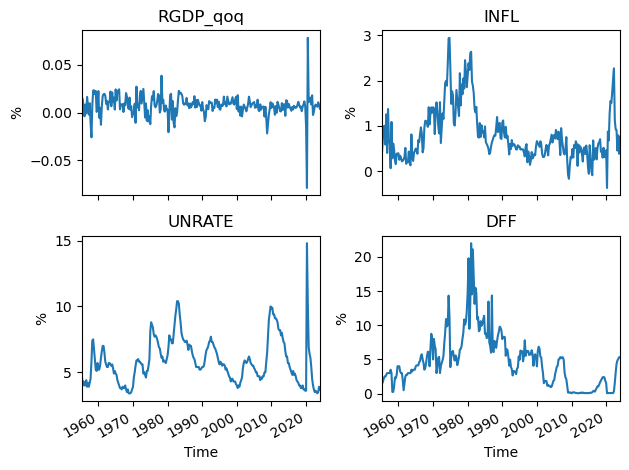

In [25]:
fig = plt.figure()  # Create a new figure

date_series = df_selected.index # Convert the index to datetime

# Add a subplot for 'RGDP_qoq'
ax1 = fig.add_subplot(2, 2, 1)  
ax1.plot(date_series, df_selected.RGDP_qoq)
ax1.set_title('RGDP_qoq')

# Add a subplot for 'INFL'
ax2 = fig.add_subplot(2, 2, 2)  
ax2.plot(date_series, df_selected.INFL)
ax2.set_title('INFL')

# Add a subplot for 'UNRATE'
ax3 = fig.add_subplot(2, 2, 3)  
ax3.plot(date_series, df_selected.UNRATE)
ax3.set_title('UNRATE')

# Add a subplot for 'DFF'
ax4 = fig.add_subplot(2, 2, 4)  
ax4.plot(date_series, df_selected.DFF)
ax4.set_title('DFF')

# Set the x-label for both plots in one line
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel('Time')
    ax.set_ylabel('%')
    ax.set_xlim([df_selected.index.min(), df_selected.index.max()]) # Set the x-axis limits to the start and end dates

plt.gcf().autofmt_xdate()   # some better formatting for x axis
plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()

## 2: Effect of Government Investment on Unemployment

### 2.1 
Download data on GDP (’GDPC1’), government spending (’GCEC1’) and unemployment (’UNRATE’) from FRED.

### 2.2
Add new columns transforming GDP and government spending to a year-over-year growth rate in percent.

In [26]:
# specify starting and ending dates
start = datetime.datetime(1955,1,1)
end = datetime.datetime(2023,1,1)

datelist = pd.date_range(start=start, end=end, freq='QS') # freq='QS' means quarterly frequency at the start of the quarter
print('total number of quarters:', len(datelist))

total number of quarters: 273


In [27]:
indicator_list = ['GDPC1', 'UNRATE', 'GCEC1']
indicator_names = ['Real GDP', 'Unemployment Rate', 'Real Government Spending']
# indicator_names = ['Real GDP', 'Unemployment Rate', 'Real Government Consumption Expenditures and Gross Investment']

df = pandas_datareader.data.DataReader(indicator_list, 'fred', start, end)
df = df.resample('QS').ffill() # resample to quarterly frequency

# rename columns according to the indicator names
df.rename(columns={'GDPC1': 'RGDP', 'UNRATE': 'UNRATE', 'GCEC1': 'RGovSpending'}, inplace=True)

# Add year-over-year growth rates
df['RGDP_yoy'] = df['RGDP'].pct_change(periods=4) # 4 quarters in a year
df['RGovSpending_yoy'] = df['RGovSpending'].pct_change(periods=4) # 4 quarters in a year


df.dropna(inplace=True) # drop rows with NaN values # inplace=True modifies the original dataframe instead of creating a new one

df.head(10)

,RGDP,UNRATE,RGovSpending,RGDP_yoy,RGovSpending_yoy
DATE,,,,,
1956-01-01,3117.922,4.0,1025.219,0.032170,-0.023443
1956-04-01,3143.694,4.0,1045.932,0.024035,0.006143
1956-07-01,3140.874,4.4,1036.749,0.009480,-0.009046
1956-10-01,3192.570,3.9,1063.129,0.019968,0.036724
1957-01-01,3213.011,4.2,1085.921,0.030498,0.059209
1957-04-01,3205.970,3.9,1080.303,0.019810,0.032862
1957-07-01,3237.386,4.2,1089.494,0.030728,0.050875
1957-10-01,3203.894,4.5,1107.405,0.003547,0.041647
1958-01-01,3120.724,5.8,1097.821,-0.028723,0.010958


### 2.3
Use the Matplotlib library to plot the unemployment rate and government spending as well as its year-over-year growth rate.

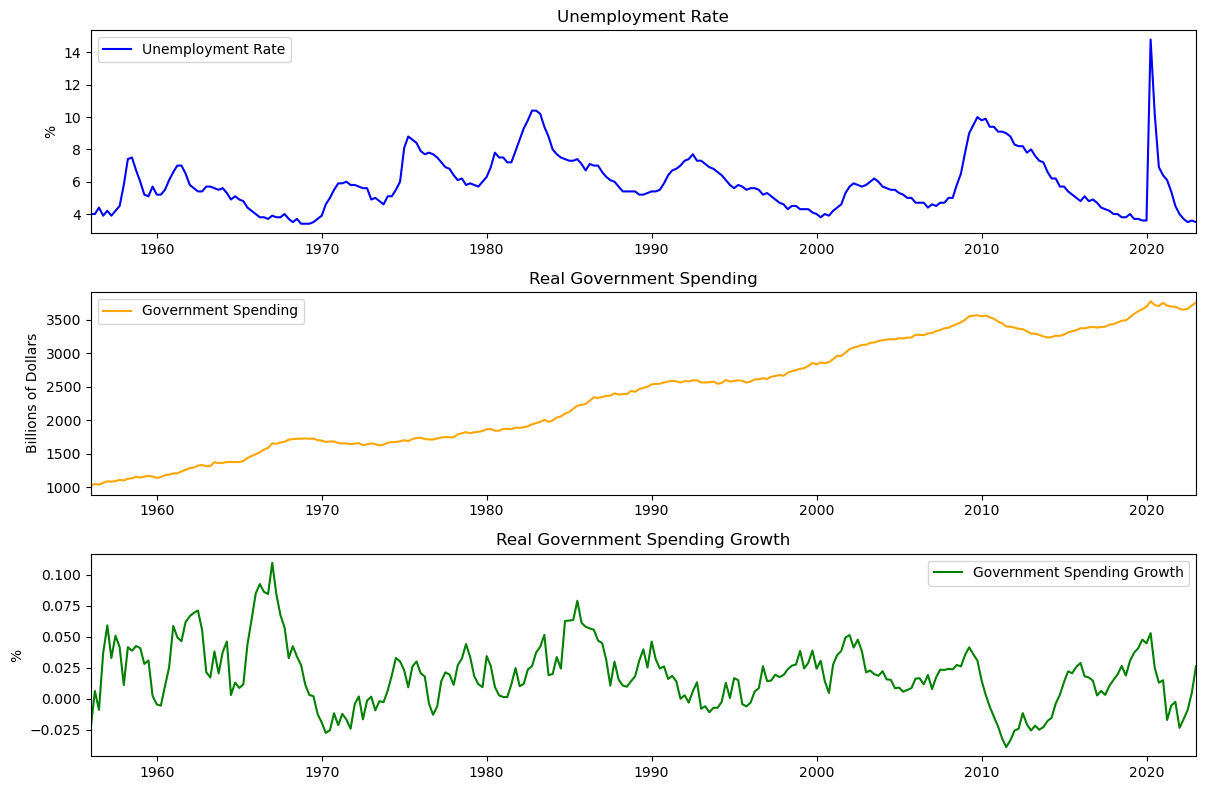

In [28]:
# Plot investment, investment share, and investment share change using axes objects
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

# Plot Unemployment Rate
axes[0].plot(df.index, df['UNRATE'], label='Unemployment Rate', color='blue')
axes[0].set_title('Unemployment Rate')
axes[0].set_ylabel('%')
axes[0].legend()

# Plot Government Spending
axes[1].plot(df.index, df['RGovSpending'], label='Government Spending', color='orange')
axes[1].set_title('Real Government Spending')
axes[1].set_ylabel('Billions of Dollars')
axes[1].legend()

# Plot Government Spending Growth
axes[2].plot(df.index, df['RGovSpending_yoy'], label='Government Spending Growth', color='green')
axes[2].set_title('Real Government Spending Growth')
axes[2].set_ylabel('%')
axes[2].legend()

# Set x-axis limits for all subplots
for ax in axes:
    ax.set_xlim([df.index.min(), df.index.max()])
    # ax.set_xlabel('Date')

# Adjust layout
plt.tight_layout()
plt.show()

### 2.4

Carry out the following regressions with unemployment as the dependent variable and the following independent variables:

(a) Government spending.

(b) Growth in government spending.

(c) Growth in government spending and GDP.

In [29]:
# OLS regression of Unemployment Rate on Real Government Spending
import statsmodels.api as sm
X = df['RGovSpending']
X = sm.add_constant(X)  # add a constant term to the predictor
y = df['UNRATE']
model1 = sm.OLS(y, X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 UNRATE   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.126
Date:                Thu, 01 May 2025   Prob (F-statistic):              0.290
Time:                        06:32:46   Log-Likelihood:                -523.94
No. Observations:                 269   AIC:                             1052.
Df Residuals:                     267   BIC:                             1059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.5917      0.321     17.412   

In [30]:
X = df['RGovSpending_yoy']
X = sm.add_constant(X)  # add a constant term to the predictor
y = df['UNRATE']
model2 = sm.OLS(y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 UNRATE   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     4.497
Date:                Thu, 01 May 2025   Prob (F-statistic):             0.0349
Time:                        06:32:46   Log-Likelihood:                -522.26
No. Observations:                 269   AIC:                             1049.
Df Residuals:                     267   BIC:                             1056.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.0837      0.131  

In [31]:
X = df[['RGovSpending_yoy', 'RGDP_yoy']]
X = sm.add_constant(X)  # add a constant term to the predictor
y = df['UNRATE']
model3 = sm.OLS(y, X).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 UNRATE   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     16.84
Date:                Thu, 01 May 2025   Prob (F-statistic):           1.30e-07
Time:                        06:32:46   Log-Likelihood:                -508.48
No. Observations:                 269   AIC:                             1023.
Df Residuals:                     266   BIC:                             1034.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.6928      0.168  